# Cities

Date: 2025/07/13

The final list I want to create:

```
+-------+----------+-----------+--------+-------+
| place | latitude | longitude | counts | order |
+-------+----------+-----------+--------+-------+
|       |          |           |        |       |
                :       :
|       |          |           |        |       |
+-------+----------+-----------+--------+-------+
```

In [1]:
import sqlite3

import pandas as pd
with sqlite3.connect('../data/bach.db') as conn:
    paragraphs = pd.read_sql('SELECT * FROM paragraphs', conn)

## Listing up locations in the book

In [2]:
import google.genai as genai
import os

GEMINI_API_KEY = os.environ["GEMINI_API_KEY"]
MODEL = "gemini-2.5-flash"

client = genai.Client(api_key=GEMINI_API_KEY)

In [3]:
response = client.models.generate_content(
    model=MODEL,
    contents=f"""
    Extract the names of all places mentioned in the following paragraphs.
    If a name is misspelled, correct it.
    If a name is mentioned multiple times, include it every time.

    ## Paragraphs     
    {paragraphs.paragraph.to_list()}
    """,
    config={
        "response_mime_type": "application/json",
        "response_schema": list[str],
    }
)

places = response.parsed
places

KeyboardInterrupt: 

In [ ]:
import collections

place_freq = collections.Counter(places)
place_freq

Counter({'Leipzig': 15,
         'Weimar': 8,
         'Dresden': 7,
         'Arnstadt': 5,
         'Halle': 5,
         'Potsdam': 5,
         'New Church': 5,
         'Thuringia': 4,
         "St. Thomas' School": 4,
         "St. Thomas' Church": 4,
         "St. Nicolas' Church": 4,
         "St. Peter's Church": 4,
         'Lüneburg': 3,
         'Hamburg': 3,
         'Cöthen': 3,
         'Germany': 2,
         'Eisenach': 2,
         'Anhalt-Cöthen': 2,
         'Weissenfels': 2,
         'Poland': 2,
         'Saxony': 2,
         'London': 2,
         'University Church of St. Paul': 2,
         'School House': 2,
         'Berlin': 2,
         'Pressburg': 1,
         'Hungary': 1,
         'Wechmar': 1,
         'Gotha': 1,
         'Schwarzburg-Arnstadt': 1,
         'Italy': 1,
         'Erfurt': 1,
         'Upper Saxony': 1,
         'Lower Saxony': 1,
         'Franconia': 1,
         'Ohrdruf': 1,
         'Danzig': 1,
         "St. Michael's Convent": 1,
        

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(place_freq.items(), columns=['place', 'counts']).sort_values('counts', ascending=False)
df['latitude'] = np.nan
df['longitude'] = np.nan

df.head()

,place,counts,latitude,longitude
29,Leipzig,15,NaN,NaN
20,Weimar,8,NaN,NaN
26,Dresden,7,NaN,NaN
10,Arnstadt,5,NaN,NaN
35,Potsdam,5,NaN,NaN


<Axes: xlabel='place'>

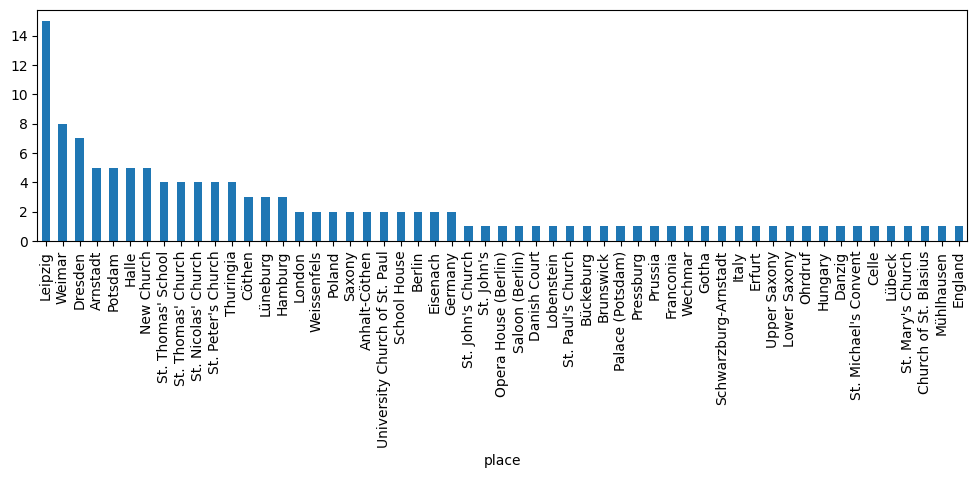

In [ ]:
df.plot(kind='bar', x='place', y='counts', figsize=(12, 3), legend=False)

## Geo locations

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="bach_network(10)")

for place in df.place:
    address=geolocator.geocode(f"{place}, Germany")
    if address is not None:
        df.loc[df.place == place, 'latitude'] = address.latitude
        df.loc[df.place == place, 'longitude'] = address.longitude

## Export data

In [ ]:
import sqlite3
import pandas as pd

with sqlite3.connect('../data/bach.db') as conn:
    df.to_sql('cities', conn, if_exists='replace', index=False)